Modelo de Hückel com Condições Periódicas

In [37]:
##bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [38]:
##estilo do gráfico
plt.style.use('seaborn-v0_8-whitegrid')

#Parâmetros Físicos
# Energias de sítio (eV)
alpha_C = 0.0
alpha_N = -1.0

# Integrais de salto (hopping) (eV)
beta = -2.5       # Intra-célula (C-N)
beta_prime = -2.0 # Inter-célula (N-C')

# Constante de rede (unidades arbitrárias, a=1 simplifica k)
a = 1.0

Tarefa 1:  matrizes H(Γ) para k=0 e H(X) para k=π/a

In [39]:
##Construir a matriz Hamiltoniana H(k) para a cadeia linear alternada CN

def get_hamiltonian(k, aC, aN, b, bp, a_lat):
    """Constrói a matriz Hamiltoniana H(k) para um dado k."""
    H11 = aC
    H12 = b + bp * np.exp(-1j * k * a_lat)
    H21 = b + bp * np.exp(1j * k * a_lat) # H21 é o conjugado de H12
    H22 = aN
    
    # A matriz precisa ser do tipo complexo para acomodar os termos de fase
    H_k = np.array([[H11, H12], 
                    [H21, H22]], dtype=complex)
    return H_k

## calculando pontos de alta simetria na zona de Brillouin
# Ponto Gamma (k=0)
k_gamma = 0
H_gamma = get_hamiltonian(k_gamma, alpha_C, alpha_N, beta, beta_prime, a)

# Ponto X (k=pi/a)
k_X = np.pi / a
H_X = get_hamiltonian(k_X, alpha_C, alpha_N, beta, beta_prime, a)

print("H(Γ) em k=0:")
print(np.round(H_gamma.real, 4)) # Usamos.real pois para k=0 e k=pi/a a matriz é real
print("\nH(X) em k=π/a:")
print(np.round(H_X.real, 4))

H(Γ) em k=0:
[[ 0.  -4.5]
 [-4.5 -1. ]]

H(X) em k=π/a:
[[ 0.  -0.5]
 [-0.5 -1. ]]


Tarefa 2: Diagonalize numericamente H(k) para vários valores de k no intervalo −π/a≤k≤π/a e obtenha as energias E1(k) e E2(k)

Com um conjunto de valores de k na primeira zona, o calculo será para cada k, construiremos e diagonalizaremos H(k) para encontrar seus autovalores, que são as energias de banda E₁(k) (banda inferior) e E₂(k) (banda superior)

In [40]:
# --- Discretização do espaço k ---
N_k = 201 # Número de pontos em k (ímpar para incluir k=0)
k_points = np.linspace(-np.pi / a, np.pi / a, N_k)

# --- Loop de Diagonalização ---
energies = []
eigenvectors = []

for k in k_points:
    H_k = get_hamiltonian(k, alpha_C, alpha_N, beta, beta_prime, a)
    
    # Diagonaliza a matriz Hermitiana. `eigh` é otimizado para isso.
    # Retorna autovalores (eigs) e autovetores (vecs) ordenados.
    eigs, vecs = np.linalg.eigh(H_k)
    
    energies.append(eigs)
    eigenvectors.append(vecs)

# Converte as listas para arrays NumPy para facilitar a manipulação
energies = np.array(energies)
eigenvectors = np.array(eigenvectors)

Tarefa 3: Grafico daestrutura de bandas E(k)
Utilizando as energias calculadas pela diagnotização da matriz é possivel gerar o grafico da estrutura de bandas plotando E1(k) e E2(k)

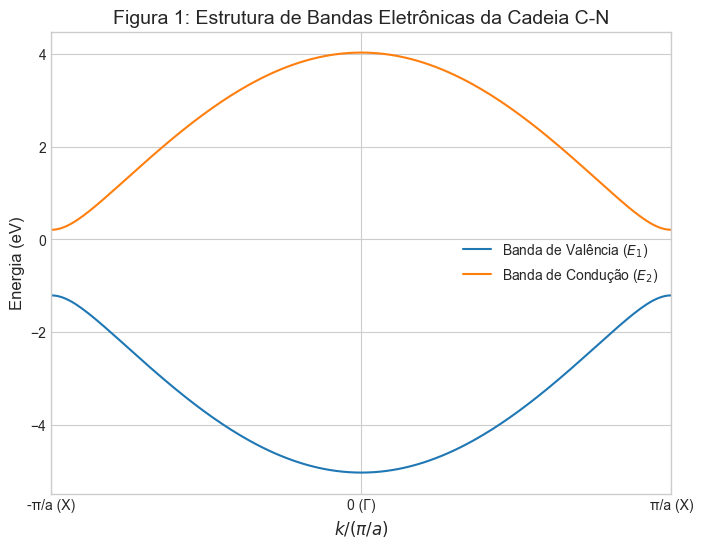

O gap de energia direto no ponto X é: 1.4142 eV


In [41]:
# --- Visualização da Estrutura de Bandas (Figura 1) ---
plt.figure(figsize=(8, 6))

# E₁(k) é a primeira coluna (índice 0) de all_energies
E1_k = energies[:, 0]
# E₂(k) é a segunda coluna (índice 1) de all_energies
E2_k = energies[:, 1]

plt.plot(k_points / (np.pi / a), E1_k, label='Banda de Valência ($E_1$)')
plt.plot(k_points / (np.pi / a), E2_k, label='Banda de Condução ($E_2$)')

# Configurações do gráfico
plt.title('Figura 1: Estrutura de Bandas Eletrônicas da Cadeia C-N', fontsize=14)
plt.xlabel('$k / (\\pi/a)$', fontsize=12)
plt.ylabel('Energia (eV)', fontsize=12)
plt.xticks([-1, 0, 1], ['-π/a (X)', '0 (Γ)', 'π/a (X)'])
plt.xlim(-1, 1)
plt.legend()
plt.grid(True)

# Salvar o gráfico em 'images/' antes de exibir
#plt.savefig("estrutura_bandas_CN.png", dpi=300, bbox_inches="tight")

# Mostrar no notebook
plt.show()

# Cálculo do Gap de Energia para verificação
E_gap = np.min(E2_k) - np.max(E1_k)
print(f"O gap de energia direto no ponto X é: {E_gap:.4f} eV")

Tarefa 4: Determine a população eletrônica de cada sítio e a ordem de ligação para o caso em que a molécula está com a banda mais baixa totalmente ocupada.

Assumindo que a banda mais baixa (E₁(k)) está totalmente ocupada por 2 elétrons (spin up e down) para cada estado k, vamos usar os autovetores correspondentes para calcular a densidade eletrônica em cada sítio (população) e a força das ligações (ordem de ligação).

In [42]:
### População eletrônica e ordem de ligação
# Os autovetores da banda de valência (E₁) são a primeira coluna de cada matriz 2x2
# Shape de all_eigenvectors: (N_k, 2, 2)
# Pegamos o primeiro autovetor (índice 0) para cada k.
# vecs_valence terá shape (N_k, 2)
vecs_valence = eigenvectors[:, :, 0]

# --- Cálculo da População Eletrônica ---
# População = 2 * Média de |c_i|^2 sobre a BZ (fator 2 para o spin)
# |c_C(k)|^2 é o primeiro elemento do autovetor ao quadrado
pop_C = 2 * np.mean(np.abs(vecs_valence[:, 0])**2)
# |c_N(k)|^2 é o segundo elemento do autovetor ao quadrado
pop_N = 2 * np.mean(np.abs(vecs_valence[:, 1])**2)

# --- Cálculo da Ordem de Ligação ---
# Ordem de Ligação = 2 * Média de Re[c_i*. c_j] sobre a BZ

# Ligação Intra-célula (C-N), associada a β
bo_intra = 2 * np.mean(np.real(np.conj(vecs_valence[:, 0]) * vecs_valence[:, 1]))

# Ligação Inter-célula (N-C'), associada a β'
# Requer o fator de fase e^{ika} para conectar células adjacentes
bo_inter = 2 * np.mean(np.real(np.conj(vecs_valence[:, 1]) * vecs_valence[:, 0] * np.exp(1j * k_points * a)))

# --- Apresentação dos Resultados ---
print("--- TAREFA 4: Resultados da Análise de População e Ligação ---")
print("\nPopulação Eletrônica:")
print(f"  - Carbono (q_C): {pop_C:.4f}")
print(f"  - Nitrogênio (q_N): {pop_N:.4f}")
print(f"  - Soma Total: {pop_C + pop_N:.4f} (Verificação: deve ser 2.0)")
print("\nOrdem de Ligação:")
print(f"  - Intra-célula (C-N): {bo_intra:.4f}")
print(f"  - Inter-célula (N-C'): {bo_inter:.4f}")

--- TAREFA 4: Resultados da Análise de População e Ligação ---

População Eletrônica:
  - Carbono (q_C): 0.7686
  - Nitrogênio (q_N): 1.2314
  - Soma Total: 2.0000 (Verificação: deve ser 2.0)

Ordem de Ligação:
  - Intra-célula (C-N): 0.7787
  - Inter-célula (N-C'): 0.4529
